# Introduction to Computer Vision

## History of OpenCV

* In 1999 OpenCV was officially launched, OpenCV (Open Source Computer Vision)
* OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. 
* OpenCV’s core is written in C++. In python we are simply using a wrapper that executes C++ code inside of python.
* First major release 1.0 was in 2006, second in 2009, third in 2015 and 4th in 2018. with OpenCV 4.0 Beta.
* It is an Open source library containing over 2500 optimized algorithms.which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms.
* Almost all computer vision applications use OpenCV and is supported on Windows, Linux, MacOS, Android, iOS with bindings to Python, Java and Matlab.
* OpenCV has more than 47 thousand people of user community and estimated number of downloads exceeding 18 million. 

_____________________________

## Popularity of OpenCV

* OpenCV has more than 47 thousand people of user community and estimated number of downloads exceeding 18 million. 
* The library is used extensively in companies, research groups and by governmental bodies.

* Along with well-established companies like Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota that employ the library, there are many startups such as Applied Minds, VideoSurf, and Zeitera, that make extensive use of OpenCV.
* OpenCV’s deployed uses span the range from stitching streetview images together, detecting intrusions in surveillance video in India, monitoring mine equipment in China, helping robots navigate and pick up objects at Willow Garage, detection of swimming pool drowning accidents in Europe, running interactive art in Spain and New York, checking runways for debris in Turkey, inspecting labels on products in factories around the world on to rapid face detection in Japan.

____________________________________________________________________________________________________________________

## Installing OpenCV (windows , Mac ,Conda)

### For Windows users

#### Step 1 − Make sure Python and pip is preinstalled on your system

Type the following commands in command prompt to check is python and pip is installed on your system.

##### To check Python

In [1]:
#python --version

If python is successfully installed, the version of python installed on your system will be displayed.
##### To check pip

In [2]:
#pip -V

The version of pip will be displayed, if it is successfully installed on your system.

##### Step 2 − Install OpenCV
OpenCV can be installed using pip. The following command is run in the command prompt to install OpenCV.

In [3]:
#pip install opencv-python

This command will start downloading and installing packages related to the OpenCV library. Once done, the message of successful installation will be displayed.

### For Mac users

- Open Terminal

- Run the following command


In [4]:
#apt-get install python3-OpenCV

### For conda installation

If you are running Python via Anaconda, you can run a simple conda install:


In [5]:
#conda install opencv

__________________________________

![](https://pythonprogramming.net/static/images/opencv/opencv-intro-tutorial-python.gif)

![](https://iili.io/JMw3qF.png)

# **Content**
1. [Sharpening](#1.)
1. [Thresholding and Binarizationg](#2.)
1. [Dilation, Erosion, Opening and Closing](#3.)
1. [Edge Detection & input Gradients](#4.)
1. [Perpsective Transform](#5.)
1. [Scaling, re-sizing and interpolations](#6.)
1. [Cropping](#7.)
1. [Blurring](#8.)
1. [Contours](#9.)
1. [Approximating Contours and Convex Hull](#10.)
1. [Resources](#11.)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<a id="1."></a> 
# 1.Thresholding and Binarization 

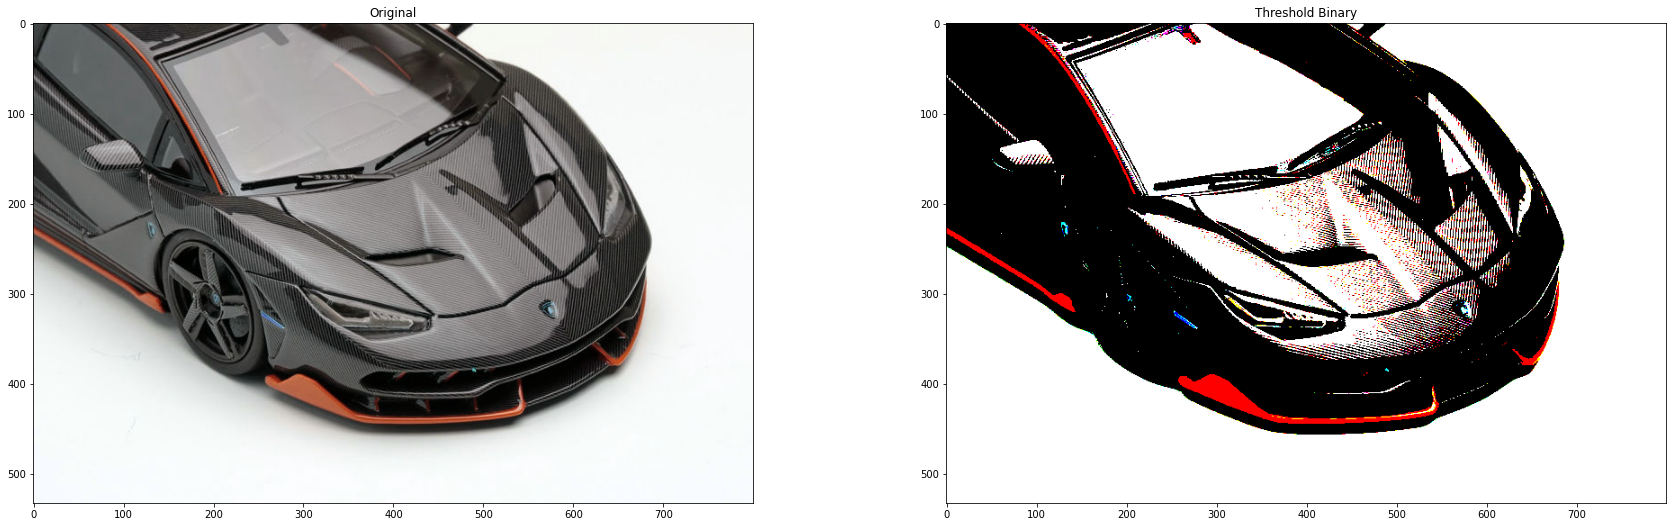

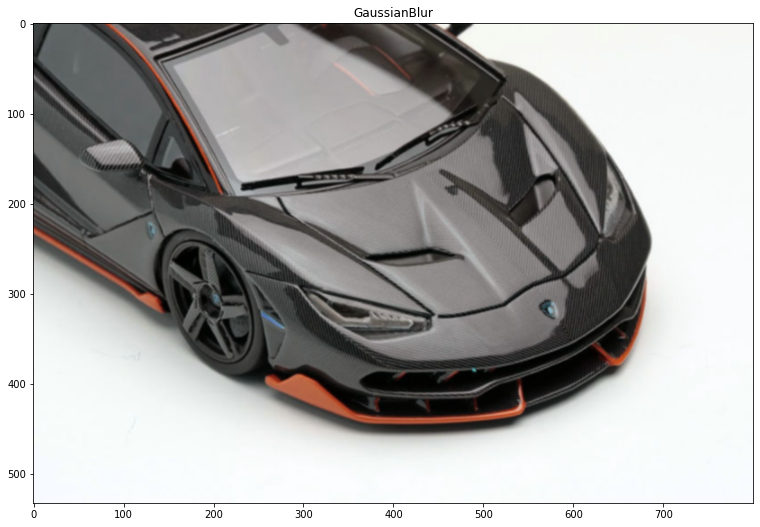

In [8]:
# Load our new input
input = cv2.imread("Resources/lambo.jpg")
# input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(input)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


# It's good practice to blur inputs as it removes noise
input = cv2.GaussianBlur(input, (3, 3), 0)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 3)
plt.title("GaussianBlur")
plt.imshow(input)


<a id="2."></a> 
# 2.Sharpening
By altering our kernels we can implement sharpening, which has the effects of in strengthening or emphasizing edges in an input.

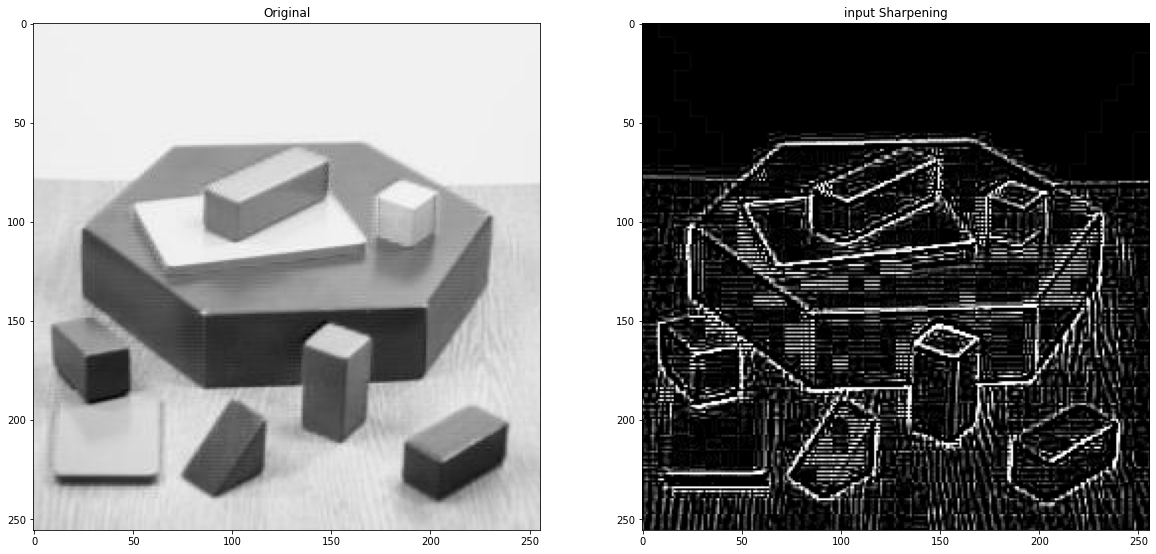

In [19]:
input = cv2.imread("Resources/blox.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(input)


# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-3,-3,-3], 
                              [-3,24,-3], 
                              [-3,-3,-3]])

# applying different kernels to the input input
sharpened = cv2.filter2D(input, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title("input Sharpening")
plt.imshow(sharpened)

plt.show()

<a id="3."></a> 
# 3.Dilation, Erosion, Opening and Closing

* **Dilation** is the reverse process with regions growing out from their boundaries.
* **Erosion** involves the removal of pixels ate the edges of the region.
* **Opening**  is used to restore or recover the original input to the maximum possible extent.
* **Closing** is used to smoother the contour of the distorted input and fuse back the narrow breaks and long thin gulfs.

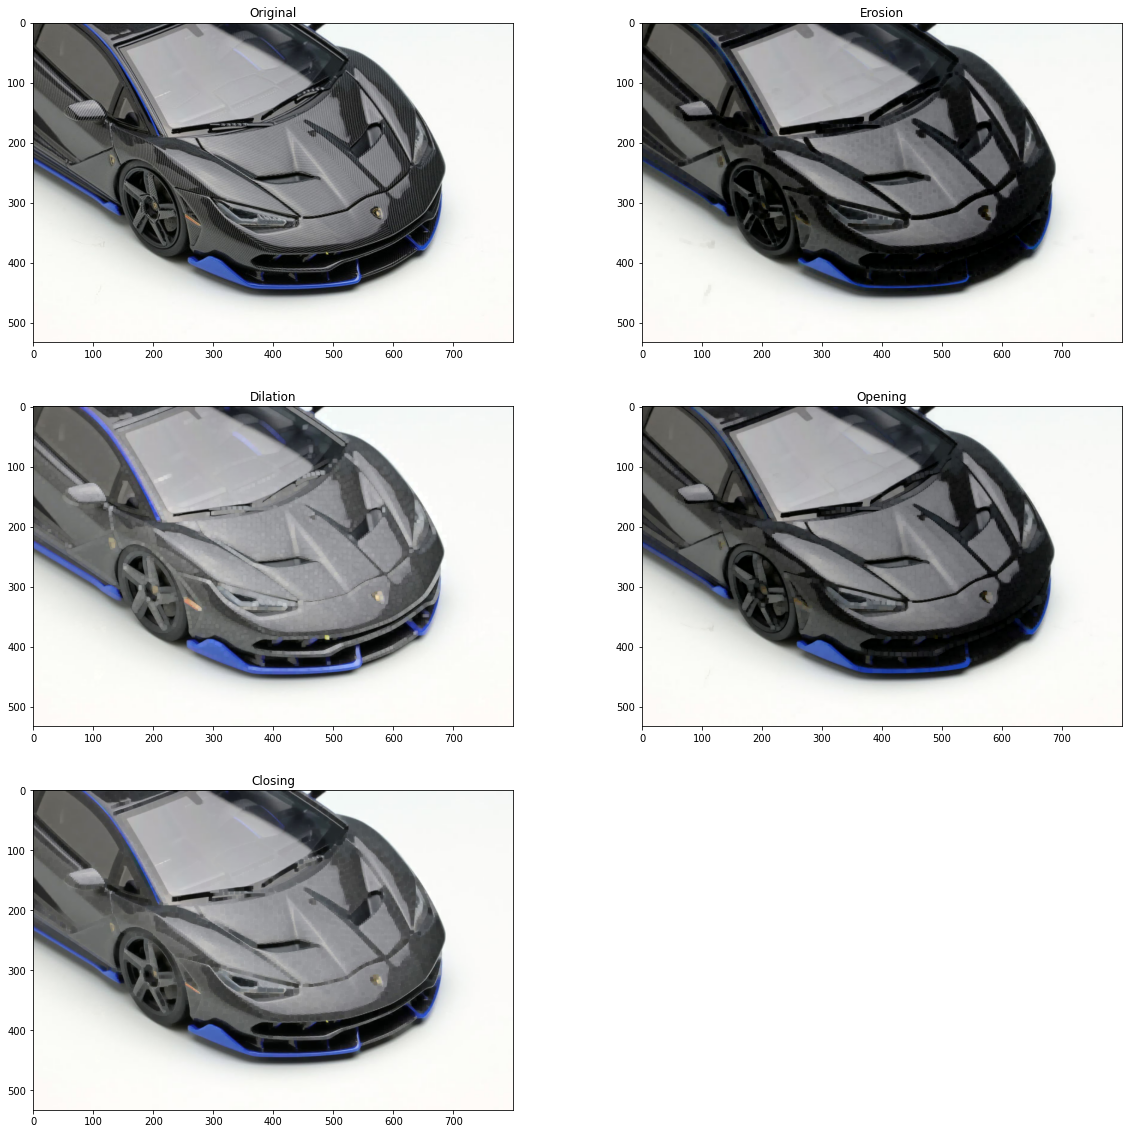

In [9]:
input = cv2.imread("Resources/lambo.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(input)


# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(input, kernel, iterations = 1)
plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# 
dilation = cv2.dilate(input, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


# Opening - Good for removing noise
opening = cv2.morphologyEx(input, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


# Closing - Good for removing noise
closing = cv2.morphologyEx(input, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

<a id="4."></a> 
# 4.Edge Detection & input Gradients

* **Sobel filter** is a gradient-based method that looks for strong changes in the first derivative of an input.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


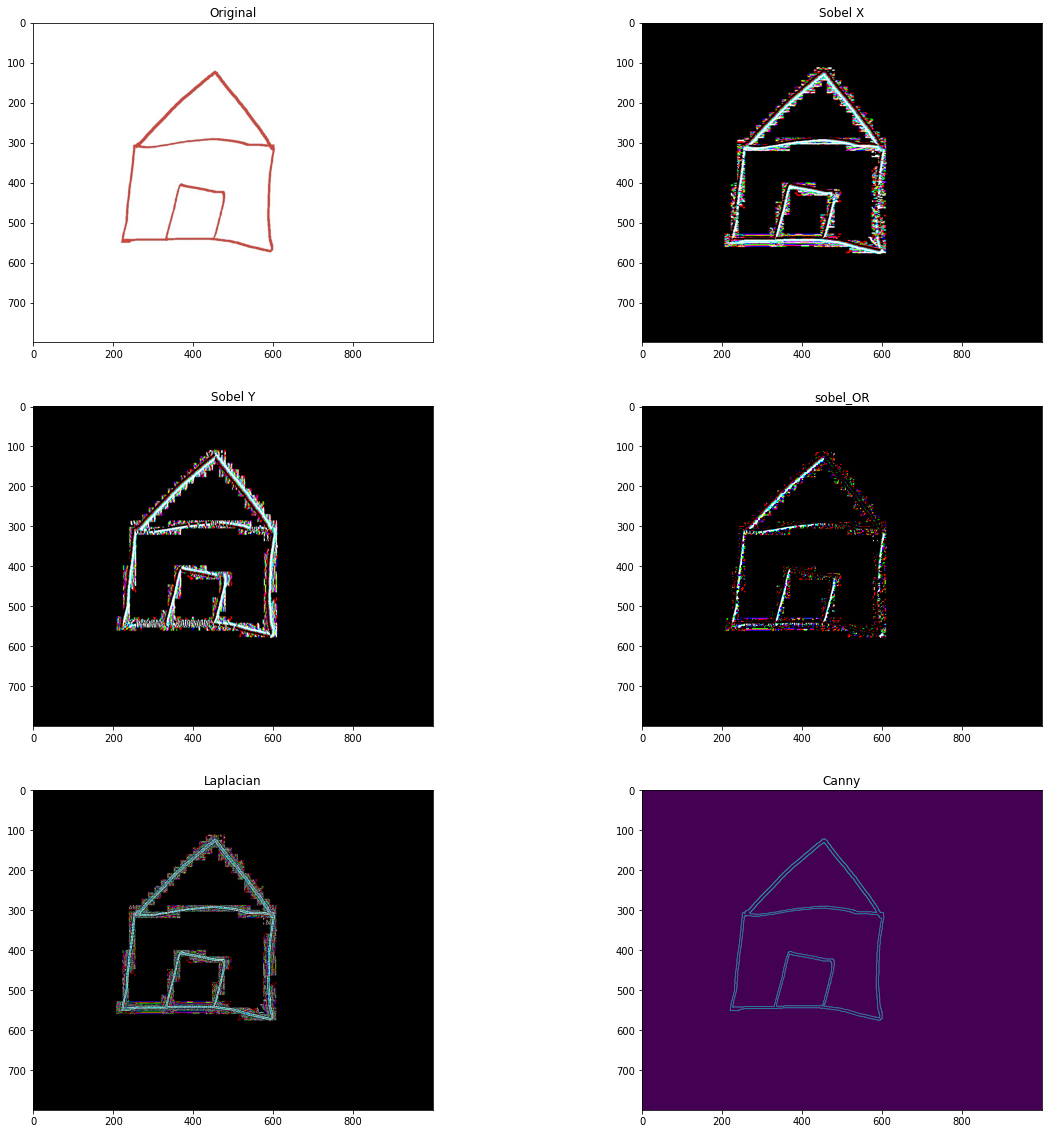

In [10]:
input = cv2.imread("Resources/house.jpg")
# input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

height, width,_ = input.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(input, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(input, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(input)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(input, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

canny = cv2.Canny(input, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

<a id="5."></a> 
# 5.Perpsective Transform

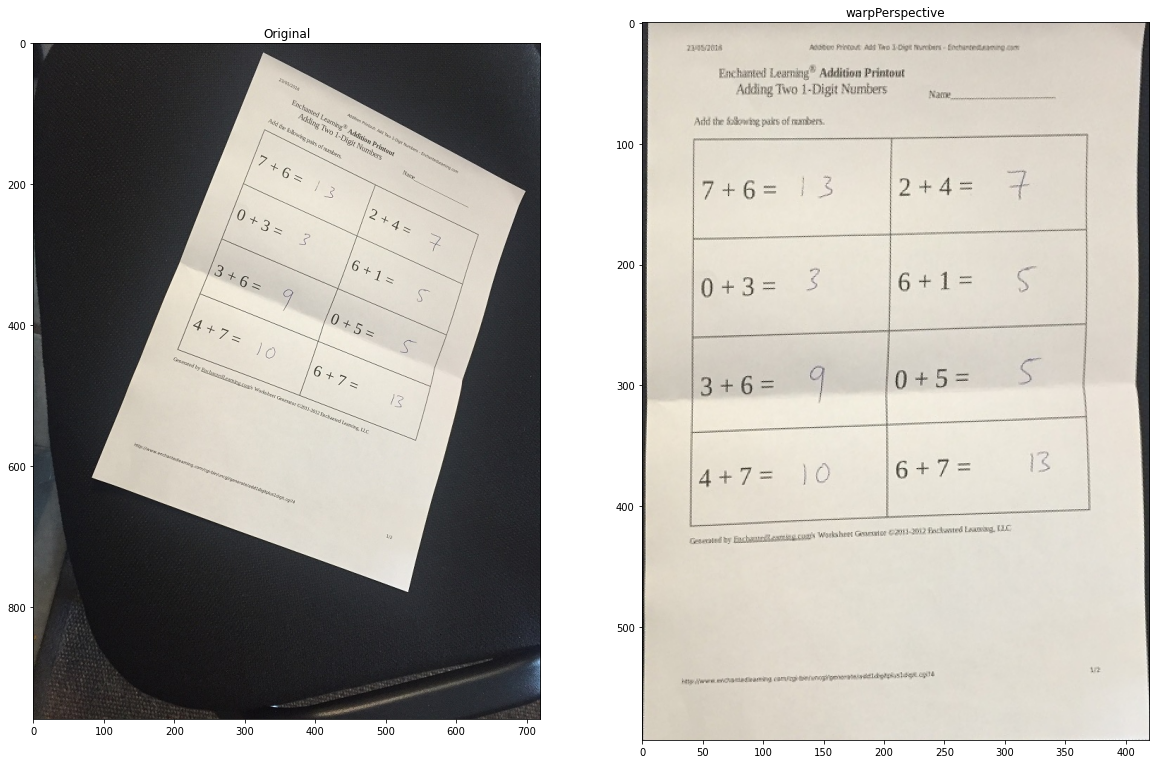

In [11]:
input = cv2.imread("Resources/scan.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(input)

points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])

M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(input, M, (420,594))

plt.subplot(1, 2, 2)
plt.title("warpPerspective")
plt.imshow(warped)


<a id="6."></a> 
# 6.Scaling, re-sizing and interpolations

Re-sizing is very easy using the cv2.resize function, it's arguments are: cv2.resize(input, dsize(output input size), x scale, y scale, interpolation)

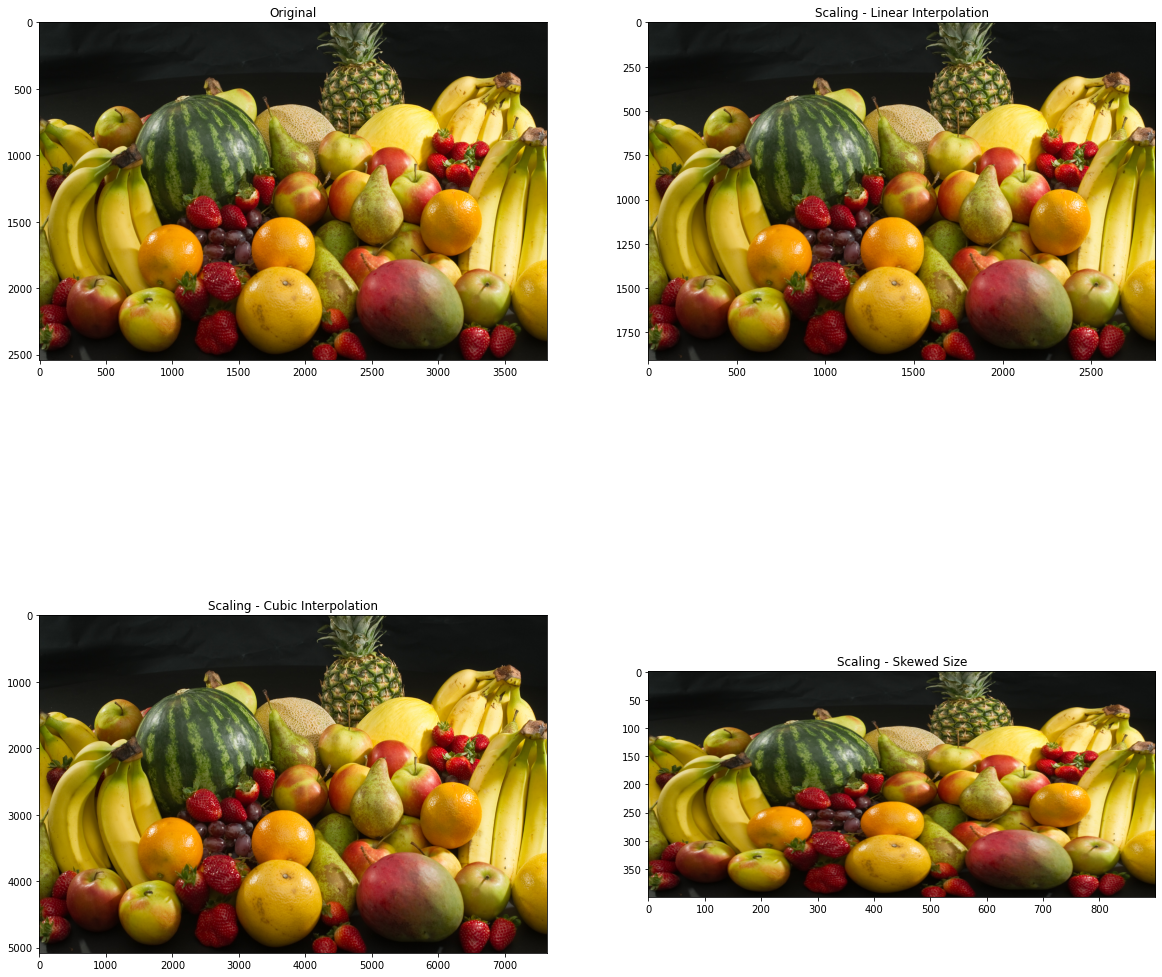

In [12]:
input = cv2.imread("Resources/fruits.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input)

# Let's make our input 3/4 of it's original size
input_scaled = cv2.resize(input, None, fx=0.75, fy=0.75)

plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(input_scaled)

# Let's double the size of our input
img_scaled = cv2.resize(input, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(input, (900, 400), interpolation = cv2.INTER_AREA)

plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

<a id="7."></a> 
# 7.Cropping

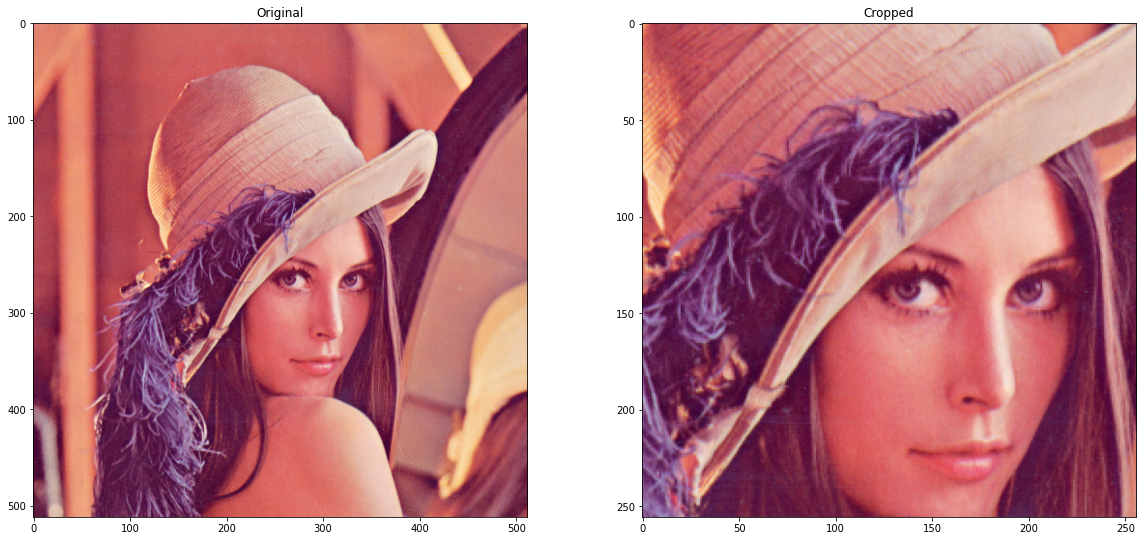

In [13]:
input = cv2.imread("Resources/Lenna.png")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input)

height, width = input.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = input[start_row:end_row , start_col:end_col]


plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)

<a id="8."></a> 
# 8.Blurring

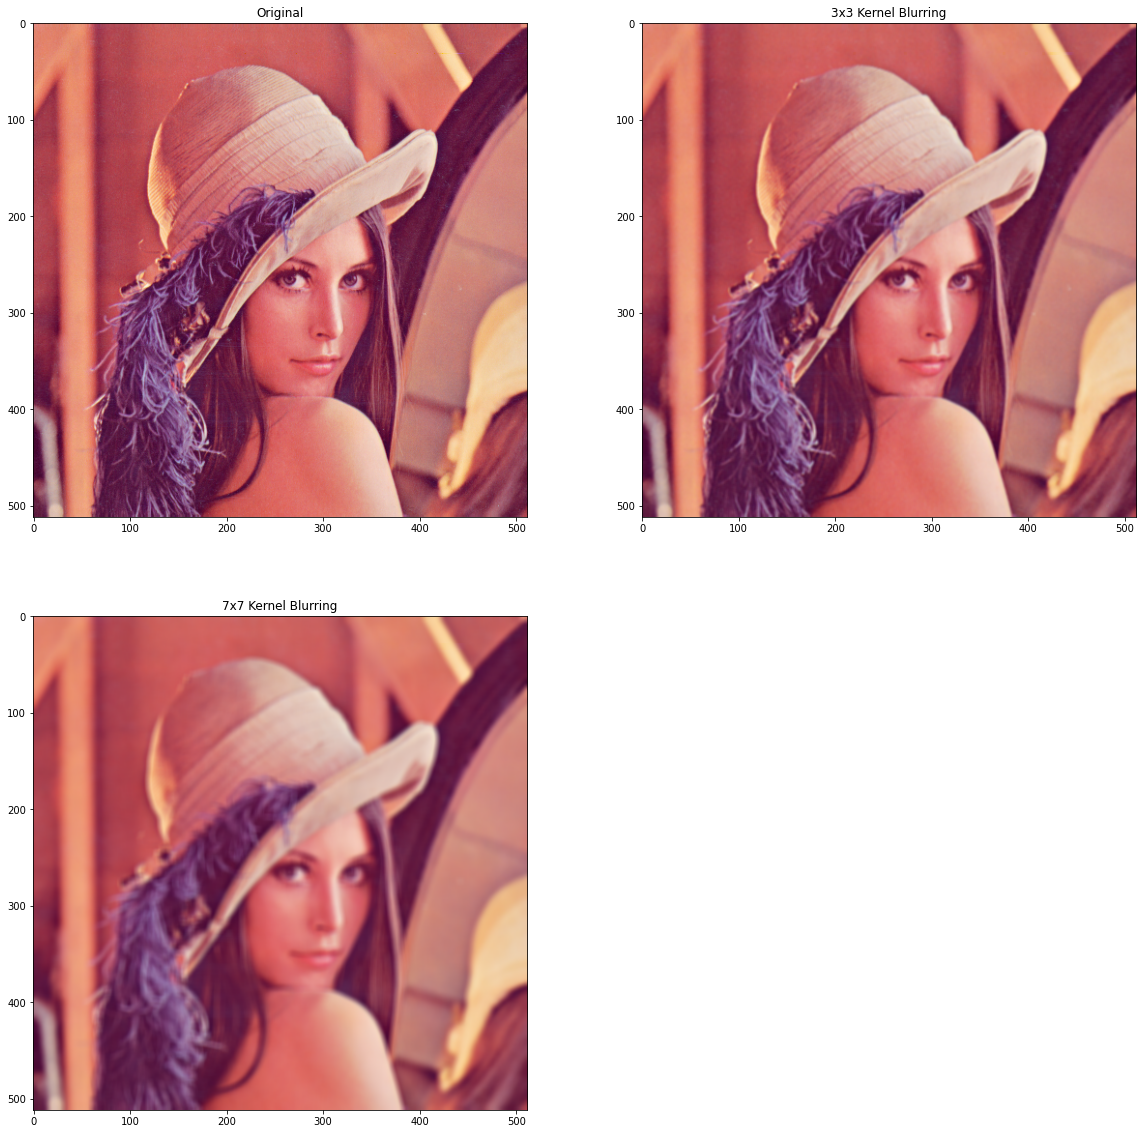

In [14]:
input = cv2.imread("Resources/Lenna.png")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an input 
blurred = cv2.filter2D(input, -1, kernel_3x3)

plt.subplot(2, 2, 2)
plt.title("3x3 Kernel Blurring")
plt.imshow(blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(input, -1, kernel_7x7)

plt.subplot(2, 2, 3)
plt.title("7x7 Kernel Blurring")
plt.imshow(blurred2)

<a id="9."></a> 
# 9.Contours

Number of Contours found = 9


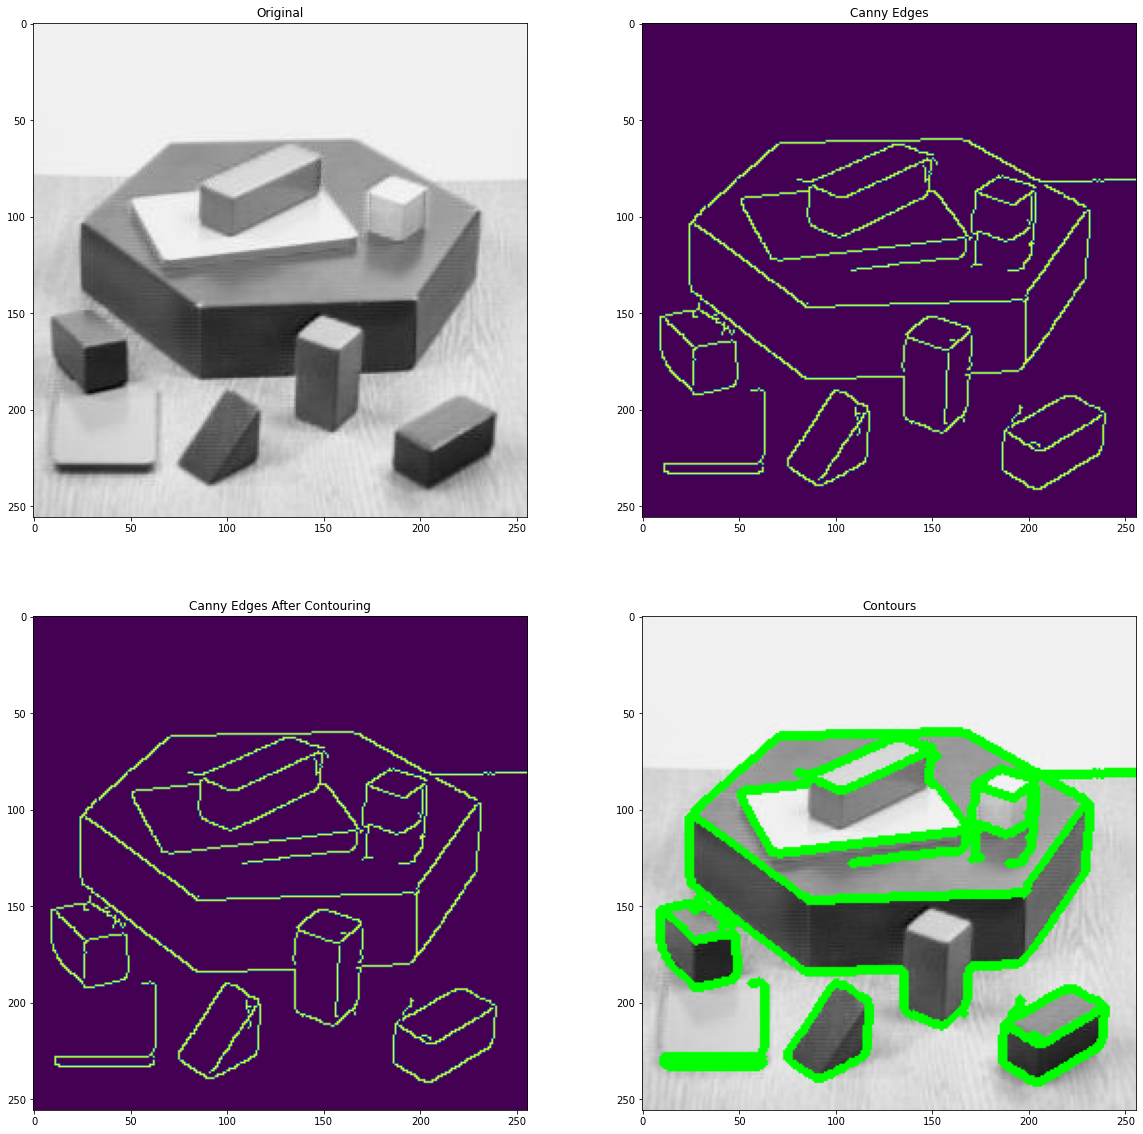

In [15]:
# Let's load a simple input with 3 black squares
input = cv2.imread("Resources/blox.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input)


# Grayscale
gray = cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your input e.g. edged.copy(), since findContours alters the input
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(input, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(input)

<a id="10."></a> 
# 10.Approximating Contours and Convex Hull

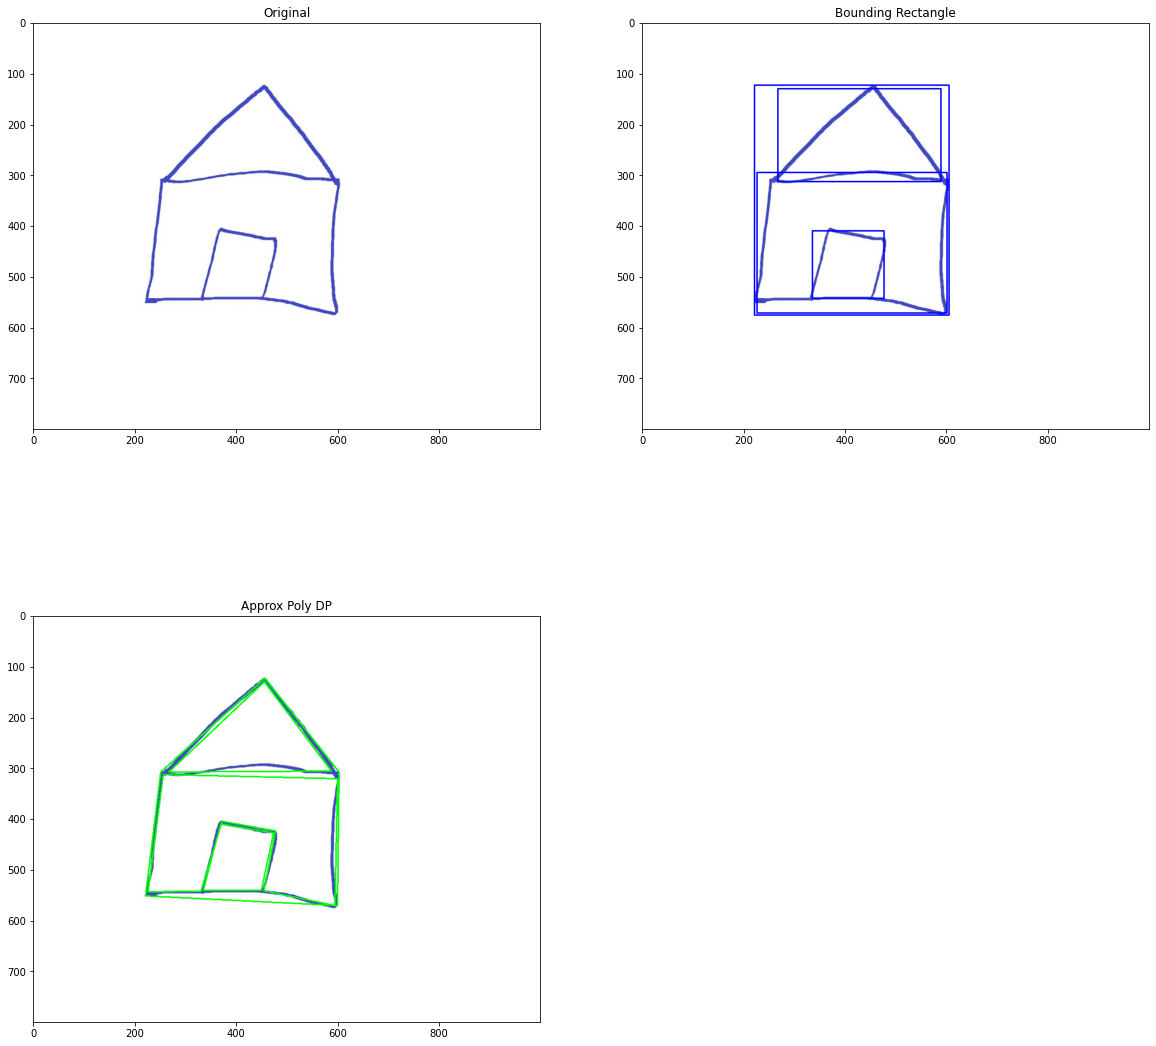

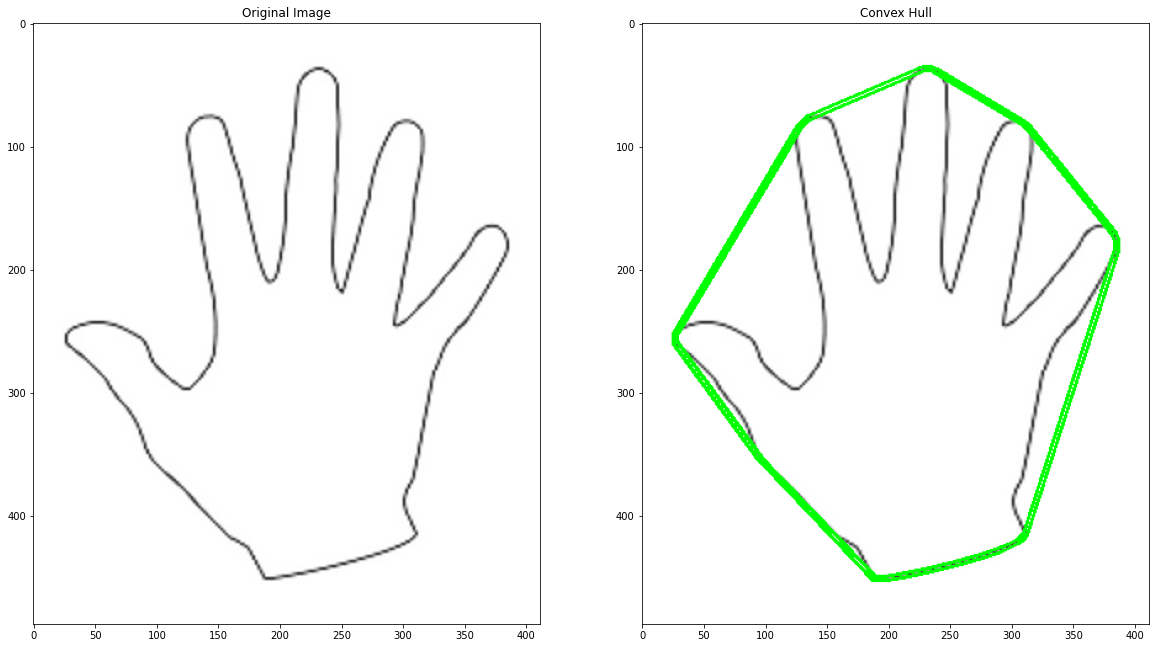

In [16]:
# Load input and keep a copy
input = cv2.imread("Resources/house.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input)

orig_input = input.copy()


# Grayscale and binarize
gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_input,(x,y),(x+w,y+h),(0,0,255),2)    
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_input)

cv2.waitKey(0) 
    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(input, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(input)

plt.show()
    
# Convex Hull


input = cv2.imread("Resources/hand.jpg")
gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original input")
plt.imshow(input)

# Threshold the input
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(input, [hull], 0, (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.title("Convex Hull")
    plt.imshow(input)

<a id="11."></a> 
# 10.Resources


* https://opencv.org/about/
* https://pythonprogramming.net/loading-images-python-opencv-tutorial/
* https://www.kaggle.com/code/gauravduttakiit/getting-started-with-opencv/
* https://www.kaggle.com/code/bulentsiyah/learn-opencv-by-examples-with-python/notebook